Сачкова-11 вариант. Задания: 2.1.14, 2.2.13, 2.3.4, 2.4.5

In [ ]:
import datetime as DT
from matplotlib import pyplot as plt
from matplotlib.dates import date2num
import matplotlib.ticker as ticker

2.1.14. Напишите программу на Python для отображения сетки и нарисуйте линейные графики значения закрытия Alphabet Inc. в период с 3 октября 2016 года по 7 октября 2016 года. Настроил линии сетки с рендерингом с большей сеткой (основной сеткой) и меньшей сетка (второстепенная сетка). Включите сетку, но отключите галочки. 
Фрагмент кода дает вывод, показанный на следующем снимке экрана:
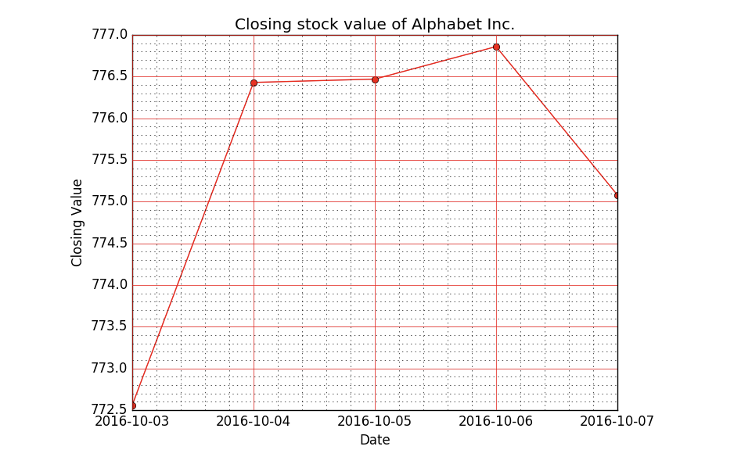

Date,Open,High,Low,Close
10-03-16,774.25,776.065002,769.5,772.559998
10-04-16,776.030029,778.710022,772.890015,776.429993
10-05-16,779.309998,782.070007,775.650024,776.469971
10-06-16,779,780.47998,775.539978,776.859985
10-07-16,779.659973,779.659973,770.75,775.080017

In [ ]:
data = [(DT.datetime.strptime('2016-10-03', "%Y-%m-%d"), 772.559998),
        (DT.datetime.strptime('2016-10-04', "%Y-%m-%d"), 776.429993),
        (DT.datetime.strptime('2016-10-05', "%Y-%m-%d"), 776.469971),
        (DT.datetime.strptime('2016-10-06', "%Y-%m-%d"), 776.859985),
        (DT.datetime.strptime('2016-10-07', "%Y-%m-%d"), 775.080017 )]
x = [date2num(date) for (date, value) in data]
y = [value for (date, value) in data]
fig = plt.figure()

graph = fig.add_subplot(111)
# Plot the data as a red line with round markers
graph.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
graph.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
graph.plot(x,y,'r-o')
# Set the xtick locations
graph.set_xticks(x)
# Set the xtick labels
graph.set_xticklabels(
        [date.strftime("%Y-%m-%d") for (date, value) in data]
        )
# naming the x axis
plt.xlabel('Date')
# naming the y axis
plt.ylabel('Closing Value')
# giving a title  
plt.title('Closing stock value of Alphabet Inc.') 
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Turn off the display of all ticks.
plt.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
plt.show()

2.2.13. Напишите программу на Python для создания графиков с панелями ошибок на одном рисунке. Прикрепите текстовую метку над каждой строкой, отображая «мужчины» (целочисленное значение).  
Пример данных
Средняя скорость: 0,2474, 0,1235, 0,1737, 0,1824
Стандартное отклонение скорости: 0,3314, 0,2278, 0,2836, 0,2645.
Фрагмент кода дает вывод, показанный на следующем снимке экрана:
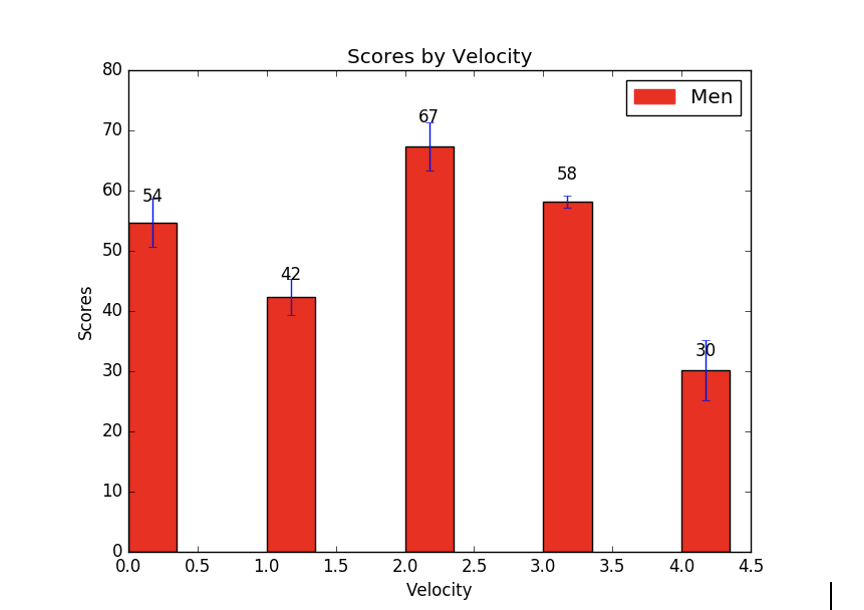

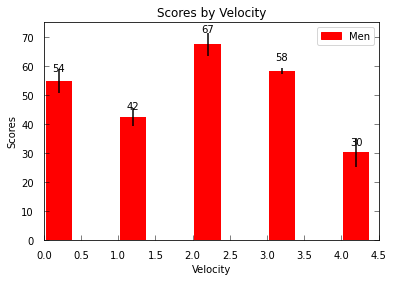

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
N = 5
men_means = (54.74, 42.35, 67.37, 58.24, 30.25)
men_std= (4, 3, 4, 1, 5)
ind = np.arange(N) + 0.2 # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

ax.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'in',    #  Рисуем деления внутри и снаружи графика
               length = 5,    #  Длинна делений
               width = 0.5,     #  Ширина делений
               pad = 10,    #  Расстояние между черточкой и ее подписью
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = True,    #  и справа
               )

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)
# add some text for labels, title and axes ticks
plt.ylabel('Scores')
plt.xlabel('Velocity')
plt.title('Scores by Velocity')
red_patch = mpatches.Patch(color='red', label='Men')
plt.legend(handles=[red_patch])
plt.xlim([0, 4.5])

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
       ha='center', va='bottom')
autolabel(rects1)
plt.show()

2.3.4. Напишите программу на Python для создания круговой диаграммы достижений с золотой медалью пяти самых успешных стран на летних Олимпийских играх 2016 года. Прочитайте данные из файла CSV.  
Пример данных:
medal.csv
страна, gold_medal
США, 46
Великобритания, 27
Китай, 26
Россия, 19
Германия, 17
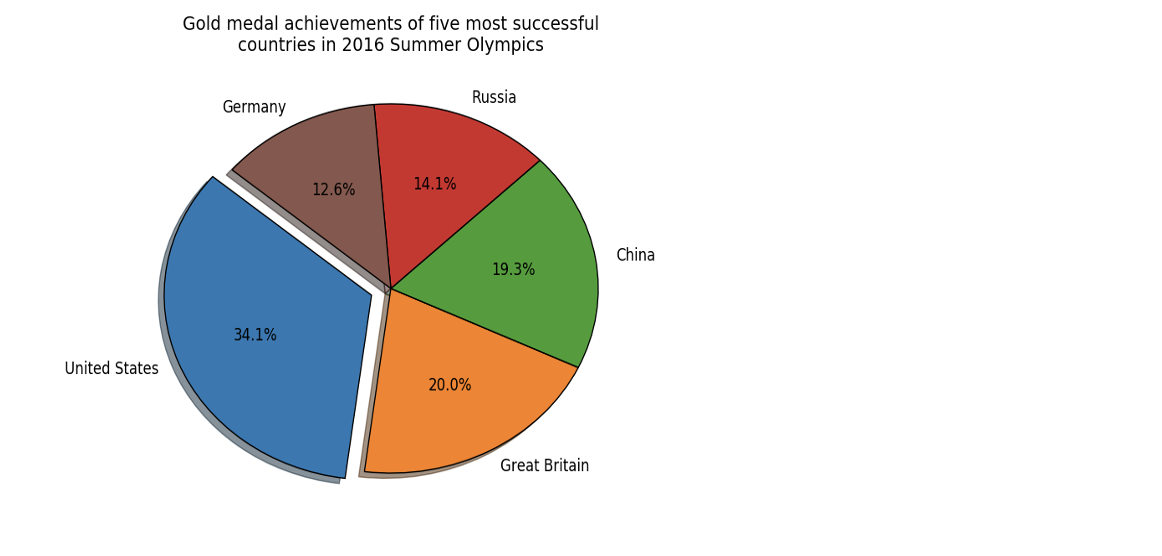

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name = fn, length=len(uploaded[fn])))

Saving medal.csv to medal (1).csv
User uploaded file "medal.csv" with length 82 bytes


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df =  pd.read_csv('medal.csv')
country_data = df['country']
medal_data = df["gold_medal"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(medal_data, labels=country_data, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Gold medal achievements of five most successful\n"+"countries in 2016 Summer Olympics")
plt.show()

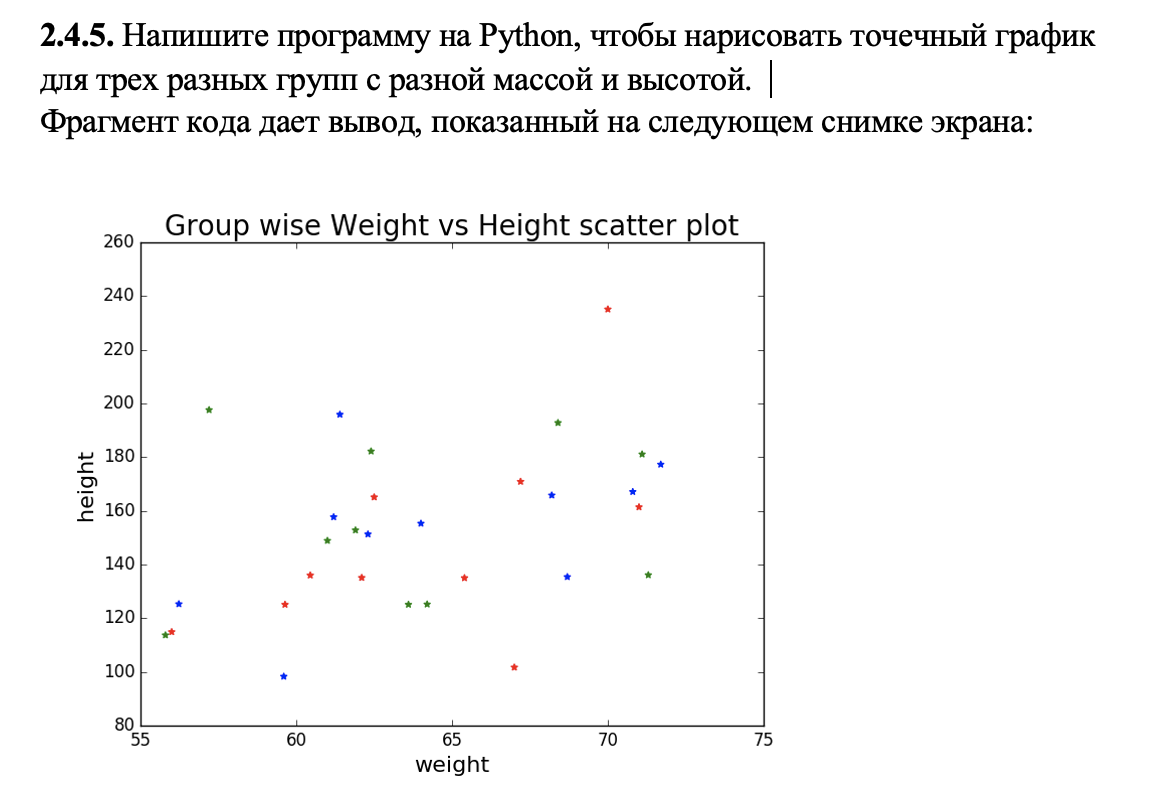

In [ ]:
def color(i):
  if i % 3 == 0:
    color = 'red'
  elif i % 3 == 1:
    color = 'green'
  else:
    color = 'blue'
  return color

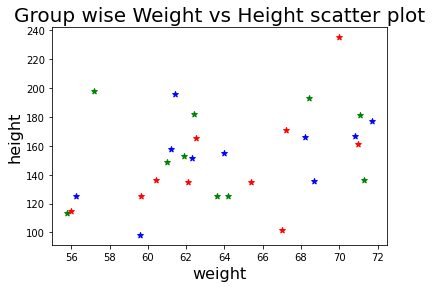

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
weight1=[67,57.2,59.6,59.64,55.8,61.2,60.45,61,56.23,56]
height1=[101.7,197.6,98.3,125.1,113.7,157.7,136,148.9,125.3,114.9] 
weight2=[61.9,64,62.1,64.2,62.3,65.4,62.4,61.4,62.5,63.6]
height2=[152.8,155.3,135.1,125.2,151.3,135,182.2,195.9,165.1,125.1] 
weight3=[68.2,67.2,68.4,68.7,71,71.3,70.8,70,71.1,71.7]
height3=[165.8,170.9,192.8,135.4,161.4,136.1,167.1,235.1,181.1,177.3]
weight=np.concatenate((weight1,weight2,weight3))
height=np.concatenate((height1,height2,height3))
for i in range(len(weight)):
  plt.scatter(weight[i], height[i], marker='*', color=color(i))
plt.xlabel('weight', fontsize=16)
plt.ylabel('height', fontsize=16)
plt.title('Group wise Weight vs Height scatter plot',fontsize=20)
plt.show()

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!echo '{"username":"galinasachkova21","key":"7d98101fe288a1ecf95d1899ae80a324"}' > ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets list -s 'geo'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 957, in dataset_list_cli
    max_size, min_size)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 922, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 922, in <listcomp>
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python3.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 86, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 126, in get_size
    while size >= 1024 and suffix_index < 4:
Ty

In [ ]:
!pip install patool
import patoolib

     |████████████████████████████████| 77 kB 3.8 MB/s 


In [ ]:
!kaggle datasets download -d utkarshxy/who-worldhealth-statistics-2020-complete

  0% 0.00/1.37M [00:00<?, ?B/s]
100% 1.37M/1.37M [00:00<00:00, 110MB/s]


In [ ]:
!ls

sample_data  who-worldhealth-statistics-2020-complete.zip


In [ ]:
patoolib.extract_archive("who-worldhealth-statistics-2020-complete.zip", outdir="kaggle2")

patool: Extracting who-worldhealth-statistics-2020-complete.zip ...
patool: running /usr/bin/7z x -okaggle2 -- who-worldhealth-statistics-2020-complete.zip
patool: ... who-worldhealth-statistics-2020-complete.zip extracted to `kaggle2'.


'kaggle2'

In [ ]:
!ls

kaggle2  sample_data  who-worldhealth-statistics-2020-complete.zip


In [ ]:
!ls kaggle2

30-70cancerChdEtc.csv			lifeExpectancyAtBirth.csv
adolescentBirthRate.csv			maternalMortalityRatio.csv
airPollutionDeathRate.csv		medicalDoctors.csv
alcoholSubstanceAbuse.csv		mortalityRatePoisoning.csv
atLeastBasicSanitizationServices.csv	mortalityRateUnsafeWash.csv
basicDrinkingWaterServices.csv		neonatalMortalityRate.csv
basicHandWashing.csv			newHivInfections.csv
birthAttendedBySkilledPersonal.csv	nursingAndMidwife.csv
cleanFuelAndTech.csv			ofHaleInLifeExpectancy.csv
crudeSuicideRates.csv			pharmacists.csv
dataAvailibilityForUhc.csv		population10SDG3.8.2.csv
dentists.csv				population25SDG3.8.2.csv
eliminateViolenceAgainstWomen.csv	reproductiveAgeWomen.csv
HALElifeExpectancyAtBirth.csv		roadTrafficDeaths.csv
HALeWHOregionLifeExpectancyAtBirth.csv	safelySanitization.csv
hepatitusBsurfaceAntigen.csv		tobaccoAge15.csv
incedenceOfMalaria.csv			uhcCoverage.csv
incedenceOfTuberculosis.csv		under5MortalityRate.csv
infantMortalityRate.csv			WHOregionLifeExpectancyAtBirth.csv
interventionA

In [ ]:
import pandas as pd

list=['30-70cancerChdEtc.csv',
      'adolescentBirthRate.csv',
      'airPollutionDeathRate.csv',
      'alcoholSubstanceAbuse.csv',
      'atLeastBasicSanitizationServices.csv',
      'basicDrinkingWaterServices.csv',
      'basicHandWashing.csv',
      'birthAttendedBySkilledPersonal.csv',
      'cleanFuelAndTech.csv',
      'crudeSuicideRates.csv',
      'dataAvailibilityForUhc.csv',
      'dentists.csv',
      'eliminateViolenceAgainstWomen.csv',
      'HALElifeExpectancyAtBirth.csv',
      'HALeWHOregionLifeExpectancyAtBirth.csv',
      'hepatitusBsurfaceAntigen.csv',
      'incedenceOfMalaria.csv',
      'incedenceOfTuberculosis.csv',
      'infantMortalityRate.csv',
      'interventionAgianstNTDs.csv',
      'lifeExpectancyAtBirth.csv',
      'maternalMortalityRatio.csv',
      'medicalDoctors.csv',
      'mortalityRatePoisoning.csv',
      'mortalityRateUnsafeWash.csv',
      'neonatalMortalityRate.csv',
      'newHivInfections.csv',
      'nursingAndMidwife.csv',
      'ofHaleInLifeExpectancy.csv',
      'pharmacists.csv',
      'population10SDG3.8.2.csv',
      'population25SDG3.8.2.csv',
      'reproductiveAgeWomen.csv',
      'roadTrafficDeaths.csv',
      'safelySanitization.csv',
      'tobaccoAge15.csv',
      'uhcCoverage.csv',
      'under5MortalityRate.csv',
      'WHOregionLifeExpectancyAtBirth.csv',
      ]
df = []
for i in list:
  df2 =pd.read_csv('kaggle2/{}'.format(i), sep=',', parse_dates=True, index_col=0)
  print(df2)

In [ ]:
df3 =pd.read_csv('kaggle2/WHOregionLifeExpectancyAtBirth.csv', sep=',', parse_dates=True, index_col=0)
df3

Period                         Indicator        Dim1  \
Location                                                                
Africa             2019  Life expectancy at birth (years)  Both sexes   
Africa             2019  Life expectancy at birth (years)        Male   
Africa             2019  Life expectancy at birth (years)      Female   
Africa             2015  Life expectancy at birth (years)  Both sexes   
Africa             2015  Life expectancy at birth (years)        Male   
...                 ...                               ...         ...   
Western Pacific    2010  Life expectancy at birth (years)        Male   
Western Pacific    2010  Life expectancy at birth (years)      Female   
Western Pacific    2000  Life expectancy at birth (years)  Both sexes   
Western Pacific    2000  Life expectancy at birth (years)        Male   
Western Pacific    2000  Life expectancy at birth (years)      Female   

                 First Tooltip  
Location                        
Africa                   64.49  
Africa                   62.37  
Africa                   66.65  
Africa                   62.56  
Africa                   60.47  
...                        ...  
Western Pacific          72.52  
Western Pacific          78.75  
Western Pacific          72.42  
Western Pacific          69.80  
Western Pacific          75.33  

[72 rows x 4 columns]

In [ ]:
import csv
Location = []
Year = []
Africa2000_19 = []
Americas2000_19 = []
South_East_Asia2000_19 = []
Europe2000_19 = []
Eastern_Mediterranean2000_19 = []
Western_Pacific2000_19 = []

with open("kaggle2/WHOregionLifeExpectancyAtBirth.csv", newline = '') as csvfile:
  reader = csv.DictReader(csvfile, delimiter = ",")
  for row in reader:
    # получаем список локаций
    if row["\ufeffLocation"] in Location:
      pass
    else:
      Location.append(row['\ufeffLocation'])
    # получаеем список годов
    if row["Period"] in Year:
      pass
    else:
      Year.append(row['Period'])

    if row["\ufeffLocation"] == 'Africa':
      if row['Dim1'] == 'Both sexes':
        Africa2000_19.append(row['First Tooltip'])
        #print(row['\ufeffLocation'],row['Period'], row['Dim1'], row['First Tooltip'])

    elif row["\ufeffLocation"] == 'Americas':
      if row['Dim1'] == 'Both sexes': 
        Americas2000_19.append(row['First Tooltip'])
        #print(row['\ufeffLocation'],row['Period'], row['Dim1'], row['First Tooltip'])

    elif row["\ufeffLocation"] == 'South-East Asia':
      if row['Dim1'] == 'Both sexes':
        South_East_Asia2000_19.append(row['First Tooltip'])
        #print(row['\ufeffLocation'],row['Period'], row['Dim1'], row['First Tooltip'])

    elif row["\ufeffLocation"] == 'Europe':
      if row['Dim1'] == 'Both sexes':  
        Europe2000_19.append(row['First Tooltip'])
        #print(row['\ufeffLocation'],row['Period'], row['Dim1'], row['First Tooltip'])
    
    elif row["\ufeffLocation"] == 'Eastern Mediterranean':
      if row['Dim1'] == 'Both sexes':
        Eastern_Mediterranean2000_19.append(row['First Tooltip'])
        #print(row['\ufeffLocation'],row['Period'], row['Dim1'], row['First Tooltip'])
    
    elif row["\ufeffLocation"] == 'Western Pacific':
      if row['Dim1'] == 'Both sexes':
        Western_Pacific2000_19.append(row['First Tooltip'])
        #print(row['\ufeffLocation'],row['Period'], row['Dim1'], row['First Tooltip'])
#print(Location)
#print(Year)
list = [
        Africa2000_19,
        Americas2000_19,
        South_East_Asia2000_19,
        Europe2000_19,
        Eastern_Mediterranean2000_19,
        Western_Pacific2000_19
]
for mass in list:
  N = len(mass) # кол-во необходимых элементов
  for item in mass[0:N]:# пеерееводим в другой тип
      mass.append(float(item))
  for item in mass[0:N]:# чистим старые значения ненужного типа
    mass.remove(item)
  print(mass)

[64.49, 62.56, 59.49, 52.65]
[77.16, 76.78, 75.44, 74.12]
[71.44, 70.2, 68.11, 63.35]
[78.24, 77.09, 75.72, 72.51]
[69.74, 68.39, 67.58, 65.02]
[77.66, 76.98, 75.46, 72.42]


First Tooltip in countrys(both sexes)


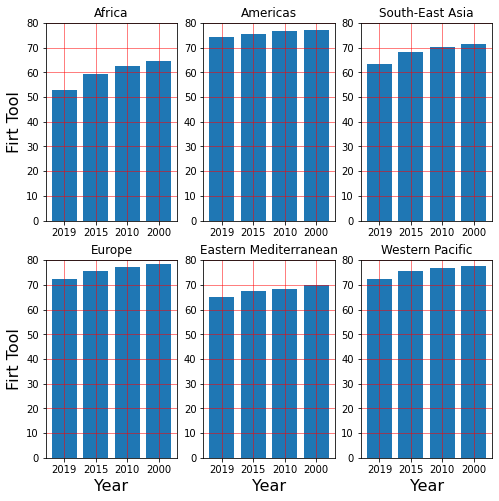

In [ ]:
print('First Tooltip in countrys(both sexes)')
x = Year


plt.figure(figsize=(8, 8))

y = Africa2000_19[::-1]

# !!! Две строки, три столбца.
# !!! Текущая ячейка - 1
plt.subplot(2, 3, 1)
plt.ylim(0,80)
plt.bar(x, y)
plt.ylabel('Firt Tool', fontsize=16)
plt.title("Africa")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')


y = Americas2000_19[::-1]
# !!! Текущая ячейка - 2
plt.subplot(2, 3, 2)
plt.ylim(0,80)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.bar(x, y)
plt.title("Americas")

y = South_East_Asia2000_19[::-1]
# !!! Текущая ячейка - 3
plt.subplot(2, 3, 3)
plt.ylim(0,80)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.bar(x, y)
plt.title("South-East Asia")

y = Europe2000_19[::-1]
# !!! Текущая ячейка - 4
plt.subplot(2, 3, 4)
plt.ylim(0,80)
plt.ylabel('Firt Tool', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.bar(x, y)
plt.title("Europe")

y = Eastern_Mediterranean2000_19[::-1]
# !!! Текущая ячейка - 5
plt.subplot(2, 3, 5)
plt.ylim(0,80)
plt.xlabel('Year', fontsize=16)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.bar(x, y)
plt.title("Eastern Mediterranean")

y = Western_Pacific2000_19[::-1]
# !!! Текущая ячейка - 6
plt.subplot(2, 3, 6)
plt.ylim(0,80)
plt.xlabel('Year', fontsize=16)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.bar(x, y)
plt.title("Western Pacific")

# Покажем окно с нарисованным графиком
plt.show()

In [ ]:
Both2019_c = [Africa2000_19[0], Americas2000_19[0], South_East_Asia2000_19[0], Europe2000_19[0], Eastern_Mediterranean2000_19[0], Western_Pacific2000_19[0]]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

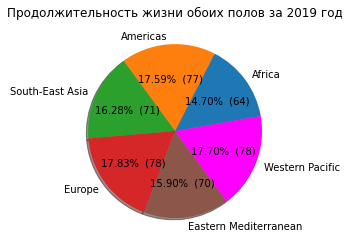

In [ ]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b", "#FF00FF"]
plt.pie(Both2019_c, labels=Location, colors=colors, autopct=make_autopct(Both2019_c), shadow=True, startangle=10)
plt.title("Продолжительность жизни обоих полов за 2019 год")
plt.show()

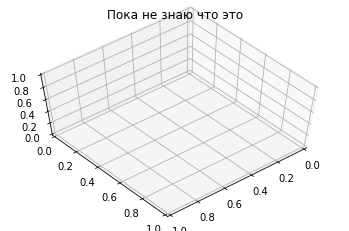

In [ ]:
# from mpl_toolkits import mplot3d

# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.set_title('Пока не знаю что это')
# ax.view_init(60, 50)
# plt.show()

In [ ]:
!ls

kaggle2  sample_data  who-worldhealth-statistics-2020-complete.zip
